## Assignment Team:
#### 1) Tilak Pandya (200534318)
#### 2) Kishan Patel (200527734)
#### 3) Namra Patel (200535046)

## Problem Statement
 The medical industry has relied on a manual process for blood transfusions, but automating the blood transfusion supply chain is crucial to meet the urgent need for blood during critical conditions. This group project aims to predict the likelihood of individuals donating blood in future blood donation camps based on their blood donation history. By analyzing a readily available dataset, the team will train multiple machine learning models, optimize their parameters, evaluate the results and compare their accuracy to select the most effective one. The goal is to improve the efficiency of blood banks and health agencies in organizing blood donations.

# Python Code

<p>The <code>transfusion.data</code> file is being inspected in this project. Blood transfusions are crucial in saving lives, but maintaining a sufficient blood supply can be a challenge for healthcare professionals. The data being used is collected from a mobile blood donation vehicle in Taiwan, which visits different universities for blood drives. The aim of the project is to predict whether a donor will give blood during the next visit of the vehicle.</p>
<p>The data is structured according to the RFMTC marketing model and stored in the <code>transfusion.data</code> file. The first step is to examine the data.</p>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)
%matplotlib inline
df = pd.read_csv("transfusion_data_with_name.csv")
df

,Sr.no,Name,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),Year,whether he/she donated blood in March 2007,Location,Location_Name
0,1,Oluwatobiloba Goulding,2,50,12500,98,2007,1,1,Kitchner Hospital
1,2,Gianluca Herring,0,13,3250,28,2007,1,1,Kitchner Hospital
2,3,Antonia Almond,1,16,4000,35,2007,1,1,Kitchner Hospital
3,4,Sally Sloan,2,20,5000,45,2007,1,3,Victoria Hospital
4,5,Kelis Hirst,1,24,6000,77,2007,0,2,Civik Hospital
...,...,...,...,...,...,...,...,...,...,...
744,745,Ioana Mccoy,21,2,500,52,2007,0,3,Victoria Hospital
745,746,Amirah Vang,23,3,750,62,2007,0,1,Kitchner Hospital
746,747,Brent Almond,39,1,250,39,2007,0,1,Kitchner Hospital
747,748,Elena Mccormack,72,1,250,72,2007,0,1,Kitchner Hospital


This code will rename the column 'whether he/she donated blood in March 2007' to 'donated' in place. The inplace argument is set to True, so the change will be made directly to the DataFrame df.

In [2]:
df.rename(
    columns = {'whether he/she donated blood in March 2007': 'donated'},
    inplace = True
)

This code will drop the columns "Sr.no", "Name", "Location_Name", and "Year" from the DataFrame df. The axis argument is set to 1 to specify that the columns should be dropped, rather than the rows.

In [3]:
df = df.drop(["Sr.no","Name","Location_Name", "Year"], axis = 1)

In [4]:
df.value_counts("donated")

donated
0    571
1    178
dtype: int64

In [5]:
df.value_counts("Location")

Location
3    262
2    259
1    228
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 749 entries, 0 to 748
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Recency (months)       749 non-null    int64
 1   Frequency (times)      749 non-null    int64
 2   Monetary (c.c. blood)  749 non-null    int64
 3   Time (months)          749 non-null    int64
 4   donated                749 non-null    int64
 5   Location               749 non-null    int64
dtypes: int64(6)
memory usage: 35.2 KB


In [7]:
df.describe()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),donated,Location
count,749.000000,749.000000,749.000000,749.000000,749.000000,749.000000
mean,9.590120,5.508678,1377.169559,34.332443,0.237650,2.045394
std,8.406069,5.837734,1459.433448,24.399368,0.425928,0.808095
min,0.000000,1.000000,250.000000,2.000000,0.000000,1.000000
25%,3.000000,2.000000,500.000000,16.000000,0.000000,1.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000,2.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000,3.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000,3.000000


In [8]:
features = df.drop(['donated'], axis = 1)
label = df['donated']

This distribution plots are used to visualize the distribution of a set of data. It helps in understanding the spread and skewness of the data and can be used to identify any outliers or skewness in the data. This distribution plot typically shows the histogram and density plot of the data, which provides a visual representation of the frequency and probability density of the data.

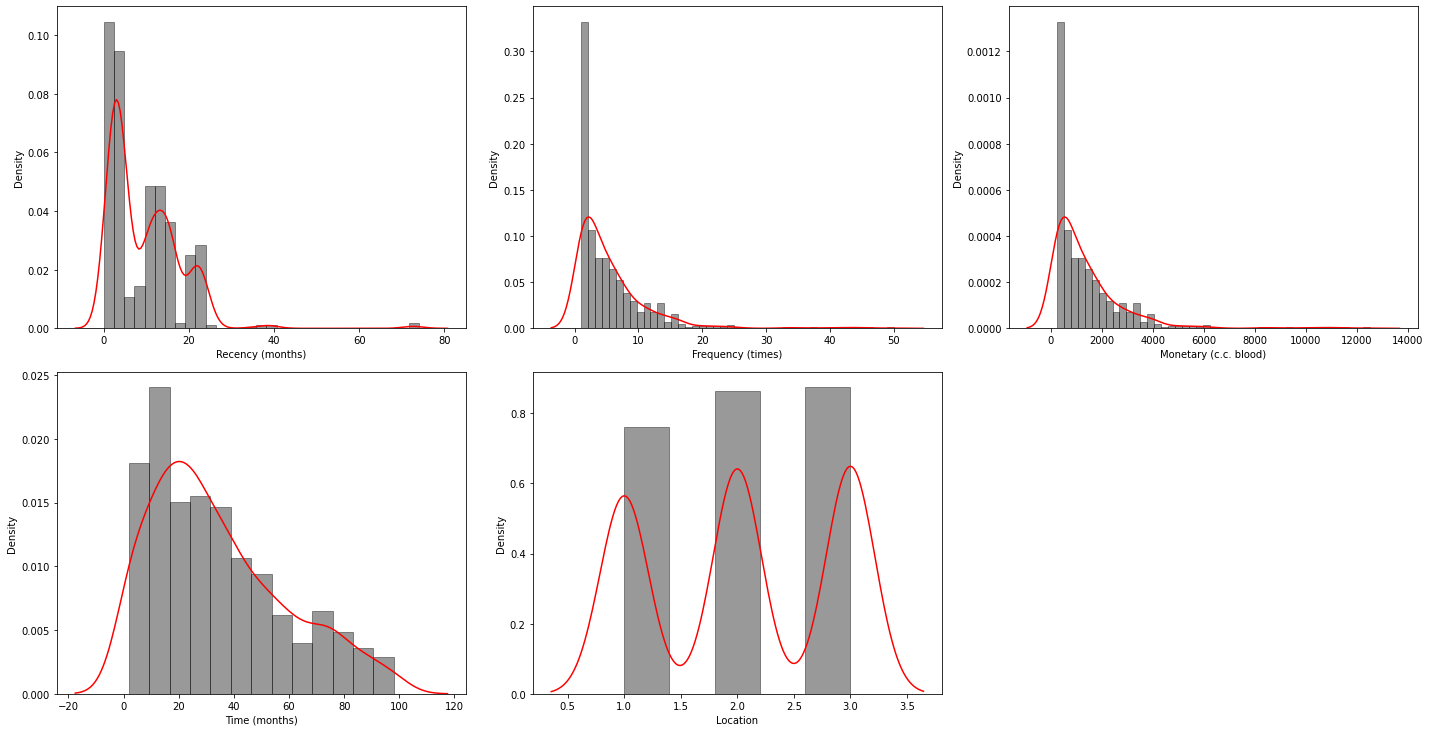

In [9]:
#Distribution plot

plt.figure(figsize=(20,20))
col = features.columns
cnt = 1

for i in col:
    plt.subplot(4,3,cnt)
    sns.distplot(features[i], hist_kws=dict(edgecolor='k', linewidth=1, color='black'), color='red')
    cnt+=1
plt.tight_layout()
plt.show()

This Box plots provide a quick visual representation of the distribution of the data and can be used to identify any skewness, outliers, and variability in the data. They are particularly useful when comparing the distribution of multiple datasets, as they provide a clear visual representation of the differences between the datasets.

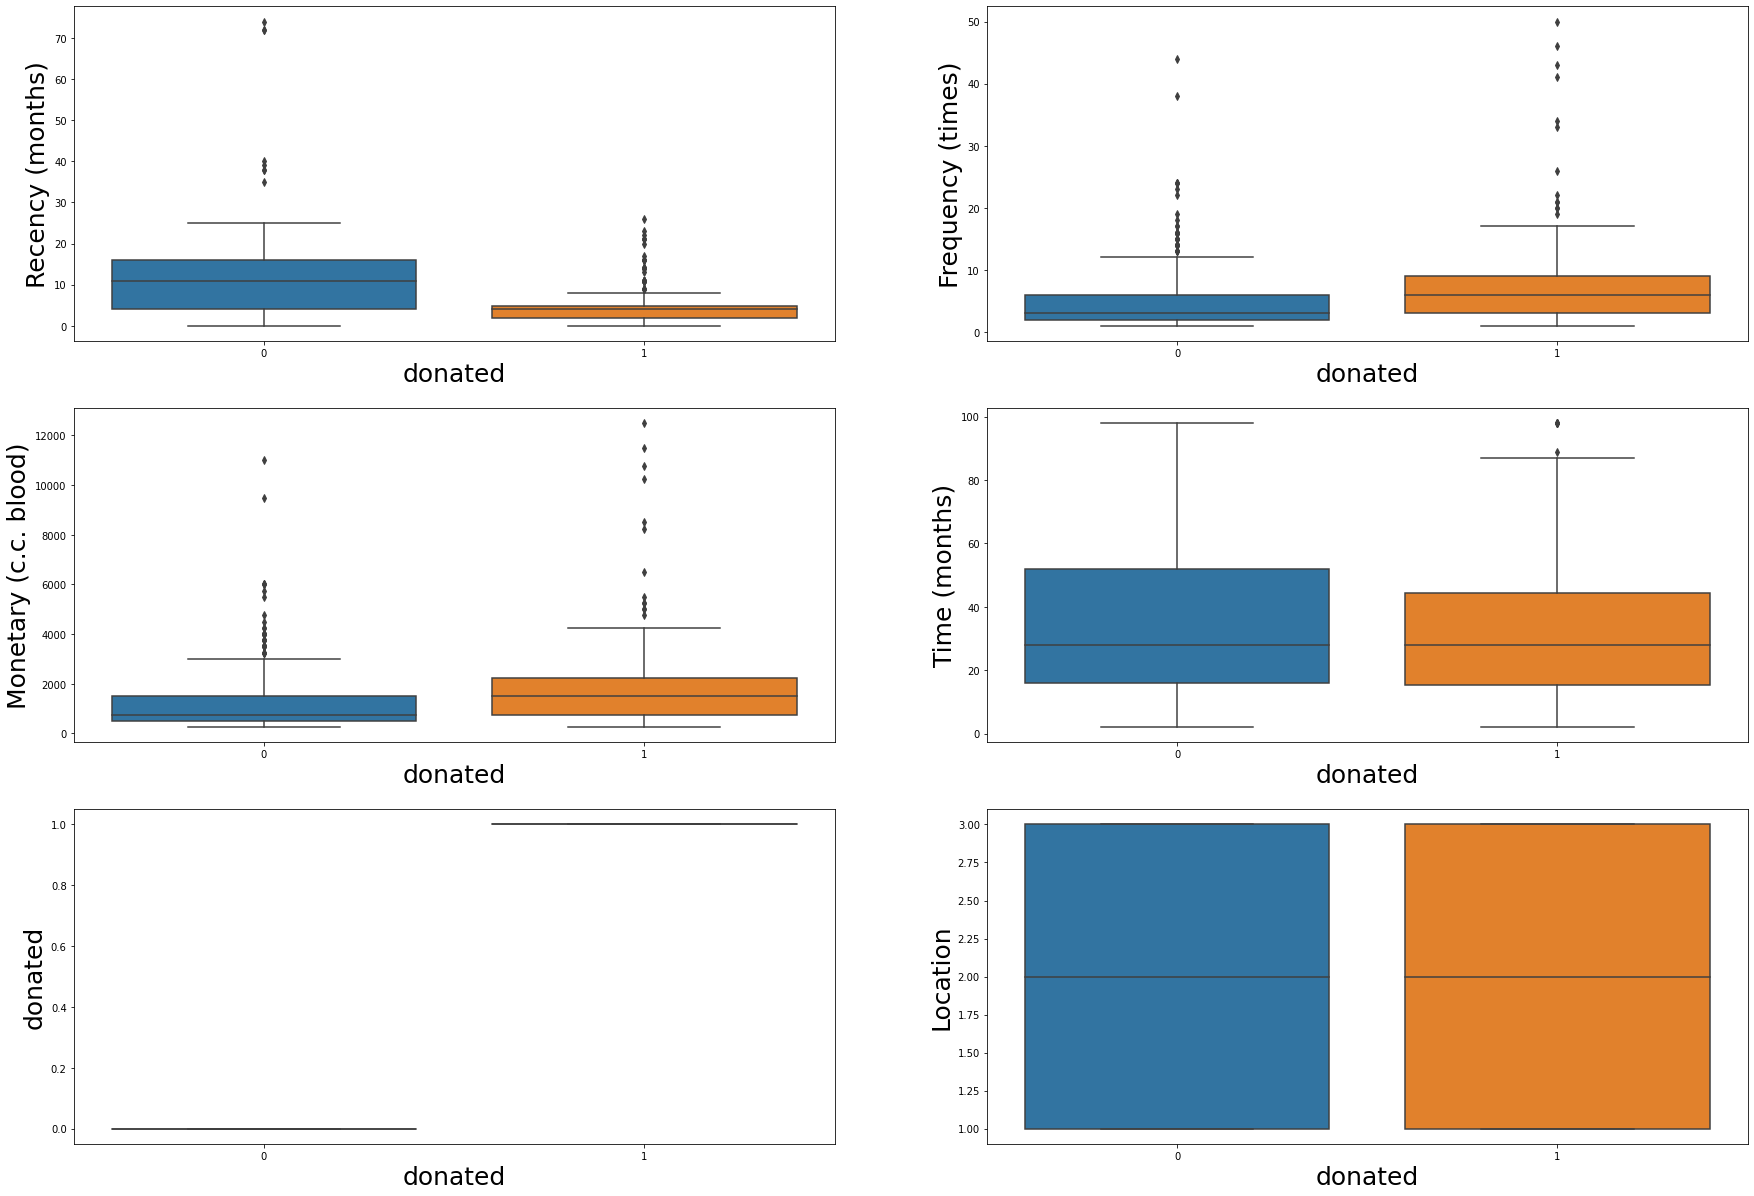

In [10]:
i=1
plt.figure(figsize=(30,80))
for col in df.columns:
    plt.subplot(11,2,i)
    sns.boxplot( df["donated"], df[col])
    plt.ylabel(col,fontsize=25)
    plt.xlabel("donated",fontsize=25)
    i=i+1
plt.show()

In this heatmap, each cell is colored according to the value of a particular variable, with darker colors indicating higher values and lighter colors indicating lower values. This allows the relationships between the variables to be easily seen and compared. this heatmaps can be used to visualize the correlation between variables, which is useful in identifying variables that are related to each other.

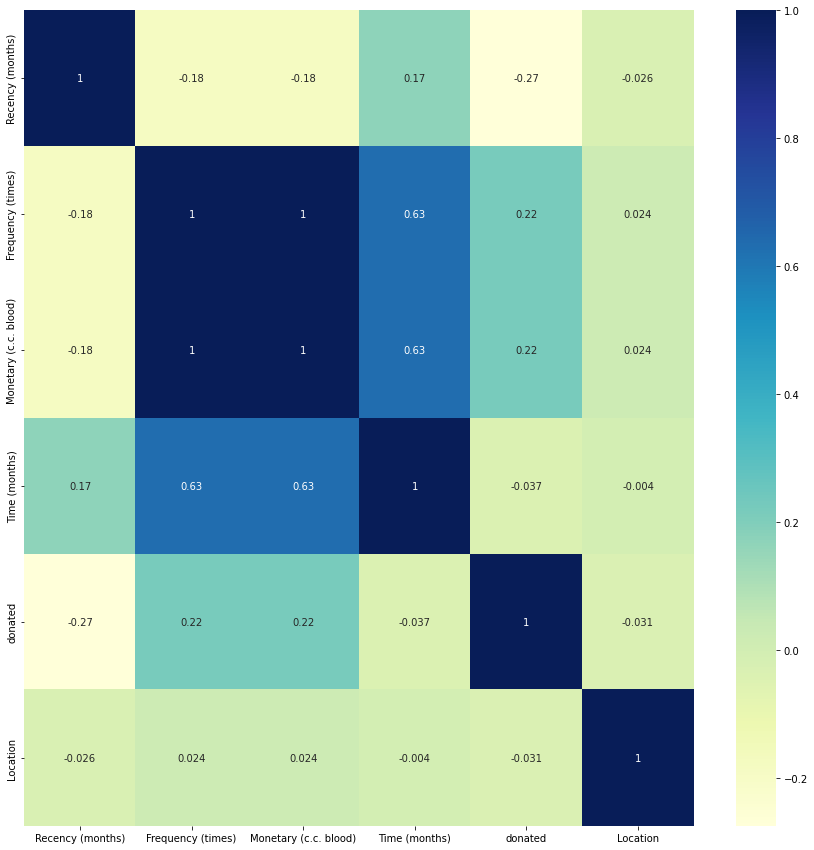

In [11]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True,
           cmap='YlGnBu');

The code below is splitting the features and label datasets into training and testing sets using the train_test_split function from the scikit-learn library. The function splits the data into two parts, with 80% of the data being used for training and 20% being used for testing. The training data will be used to train the machine learning model, while the testing data will be used to evaluate the performance of the model.

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, label, train_size=0.8)

This code defines a function called print_results that takes in an argument results, which is an object containing the results of a grid search or cross-validation operation.

In [13]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

# Logistic Regression

This code performs a grid search for the best hyperparameters for a logistic regression model in scikit-learn. It imports the LogisticRegression and GridSearchCV classes, creates a logistic regression model instance, sets up a grid search with 8-fold cross-validation and a range of values for the regularization strength parameter, and fits the model to the training data. The best parameters are then printed.

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
lr = LogisticRegression()
parameters = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}
cv = GridSearchCV(lr, parameters, cv= 8)
cv.fit(x_train, y_train)

print(cv.best_params_)

{'C': 0.1}


The mean_test_score returns an array of the mean test scores (i.e., accuracy) of the model for each set of hyperparameters in the grid search. 

In [15]:
cv.cv_results_['mean_test_score']

array([0.76123874, 0.76123874, 0.76457207, 0.76457207, 0.76457207,
       0.76457207, 0.76457207])

The std_test_score returns an array of the standard deviations of the test scores (i.e., accuracy) of the model for each set of hyperparameters in the grid search. 

In [16]:
cv.cv_results_['std_test_score']

array([0.02186341, 0.0208222 , 0.02339932, 0.02339932, 0.02339932,
       0.02339932, 0.02339932])

The cv.best_estimator_ returns the best estimator from the grid search. The estimator is the logistic regression model instance with the hyperparameters that resulted in the highest mean test score (i.e., accuracy). This estimator can be used for making predictions on new data.

In [17]:
cv.best_estimator_

LogisticRegression(C=0.1)

Now calculate the Area Under the ROC Curve (AUC) for binary classification problems.

In [18]:
from sklearn.metrics import roc_auc_score
AUC_Score = roc_auc_score(y_test, cv.predict_proba(x_test)[:,1])
AUC_Score

0.7642236024844721

# Random Forest Classifier

This code block is defining and fitting a Random Forest Classifier model using GridSearchCV for hyperparameter tuning.

In [19]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
parameters = {
    'n_estimators' : [5, 50, 250],
    'max_depth' : [2, 4, 8, 16, 32, None]
}

CV5 = GridSearchCV(rf, parameters, cv = 6)
CV5.fit(x_train, y_train)


GridSearchCV(cv=6, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 4, 8, 16, 32, None],
                         'n_estimators': [5, 50, 250]})

The purpose of this function is to print the best hyperparameters obtained through the GridSearchCV and the mean and standard deviation of the test scores for each hyperparameter combination.

In [20]:
print_results(CV5)

BEST PARAMS: {'max_depth': 4, 'n_estimators': 250}

0.755 (+/-0.018) for {'max_depth': 2, 'n_estimators': 5}
0.761 (+/-0.013) for {'max_depth': 2, 'n_estimators': 50}
0.761 (+/-0.013) for {'max_depth': 2, 'n_estimators': 250}
0.773 (+/-0.051) for {'max_depth': 4, 'n_estimators': 5}
0.776 (+/-0.063) for {'max_depth': 4, 'n_estimators': 50}
0.79 (+/-0.057) for {'max_depth': 4, 'n_estimators': 250}
0.73 (+/-0.054) for {'max_depth': 8, 'n_estimators': 5}
0.763 (+/-0.074) for {'max_depth': 8, 'n_estimators': 50}
0.766 (+/-0.073) for {'max_depth': 8, 'n_estimators': 250}
0.725 (+/-0.047) for {'max_depth': 16, 'n_estimators': 5}
0.745 (+/-0.071) for {'max_depth': 16, 'n_estimators': 50}
0.745 (+/-0.054) for {'max_depth': 16, 'n_estimators': 250}
0.738 (+/-0.061) for {'max_depth': 32, 'n_estimators': 5}
0.721 (+/-0.066) for {'max_depth': 32, 'n_estimators': 50}
0.738 (+/-0.057) for {'max_depth': 32, 'n_estimators': 250}
0.723 (+/-0.055) for {'max_depth': None, 'n_estimators': 5}
0.736 (+/-0.06

The below function calculates the prediction for the features using the model and measures the accuracy, precision, and recall of the prediction using the scikit-learn functions accuracy_score, precision_score, and recall_score. The function also measures the latency of the prediction by finding the difference between the start and end time. The results of these calculations are then printed to the console using string formatting.

In [21]:
def evaluate_model(name, model, features, labels):
    start = time()
    pred = model.predict(features)
    end = time()
    accuracy = round(accuracy_score(labels, pred), 3)
    precision = round(precision_score(labels, pred, average='macro'), 3)
    recall = round(recall_score(labels, pred, average='macro'), 3)
    print('{} -- Accuracy: {} / Precision: {} / Recall: {} / Latency: {}ms'.format(name,
                                                                                   accuracy,
                                                                                   precision,
                                                                                   recall,
                                                                                   round((end - start)*1000, 1)))

In [22]:
LR = cv.best_estimator_
RF = CV5.best_estimator_

These two lines of code are setting the Logistic Regression and Random Forest models to their respective best estimators as determined by their grid search cross-validation. The best estimators are the models with the best hyperparameter settings that achieved the highest cross-validation accuracy.

In [23]:
models={'LR':LR,'RF':RF}
models

{'LR': LogisticRegression(C=0.1),
 'RF': RandomForestClassifier(max_depth=4, n_estimators=250)}

In [24]:
import joblib
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score
from time import time
for mdl in models:
     evaluate_model(mdl, models[mdl], x_train, y_train)

LR -- Accuracy: 0.766 / Precision: 0.664 / Recall: 0.542 / Latency: 2.9ms
RF -- Accuracy: 0.823 / Precision: 0.781 / Recall: 0.685 / Latency: 54.0ms


The evaluate_model function calculates accuracy, precision, recall, and latency (time taken to make predictions) for the given model. The results are then printed in a readable format.

# References

- Kaggle. (2020, November 9). Working With TPOT. Kaggle. Retrieved April 21, 2022, from https://www.kaggle.com/code/tug004/predicting-blood-transfusion-with-tpot-0-78-auc/data 

- Adalberth G, Byström S, Kolstad K, Mallmin H, Milbrink J (1998) Postoperative drainage of knee arthroplasty is not necessary: a randomized study of 90 patients. Acta Orthop Scand 69:475–478

- Bell TH, Berta D, Ralley F, Macdonald SJ, McCalden RW, Bourne RB et al (2009) Factors affecting perioperative blood loss and transfusion rates in primary total joint arthroplasty: a prospective analysis of 1642 patients. Can J Surg 52:295–301

- Library documentation: https://scikit-learn.org/stable/documentation.html
API reference: https://scikit-learn.org/stable/modules/classes.html

Logistic Regression:

- scikit-learn documentation: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

- Introduction to Logistic Regression: https://towardsdatascience.com/logistic-regression-detailed-overview-46c4da4303bc

Random Forest:
- scikit-learn documentation: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

- Introduction to Random Forest: https://towardsdatascience.com/understanding-random-forest-58381e0602d2

GridSearchCV:
- scikit-learn documentation: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

Model evaluation metrics (accuracy, precision, recall):
- scikit-learn documentation: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

- Overview of evaluation metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9